In [34]:
# fonte: https://www.kaggle.com/shrutimechlearn/churn-modelling

import seaborn as sns
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS/main/Datasets/churn.csv'
dados = pd.read_csv(url)
dados_copy = dados.copy()

In [35]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


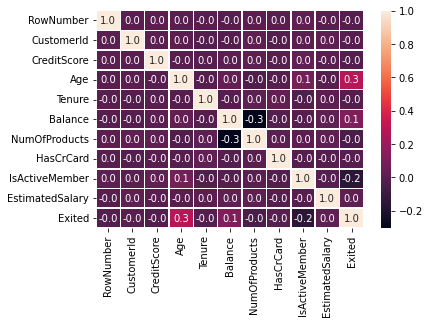

In [36]:
# Criando uma matriz de correlação
correlation = dados.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6);
plot

In [37]:
# Instalando a biblioteca sweetviz e explorando os dados
!pip install sweetviz
import sweetviz as sv
dash = sv.analyze(source = dados, target_feat = 'Exited')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.6 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


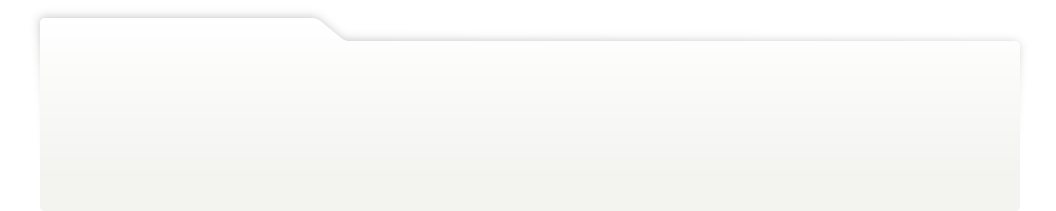
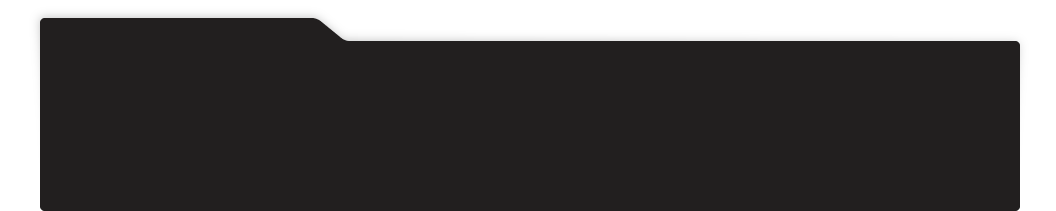
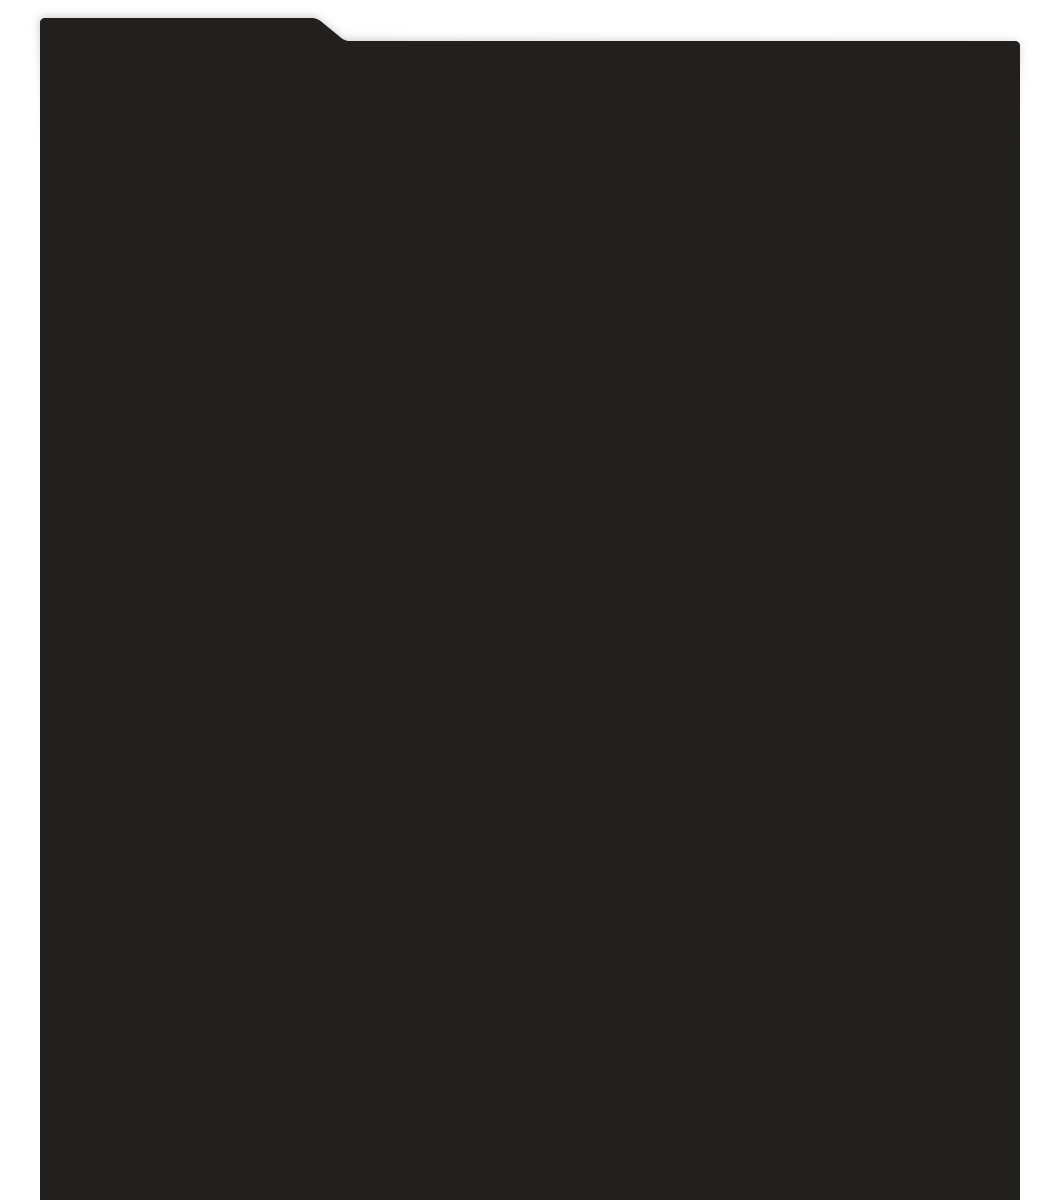
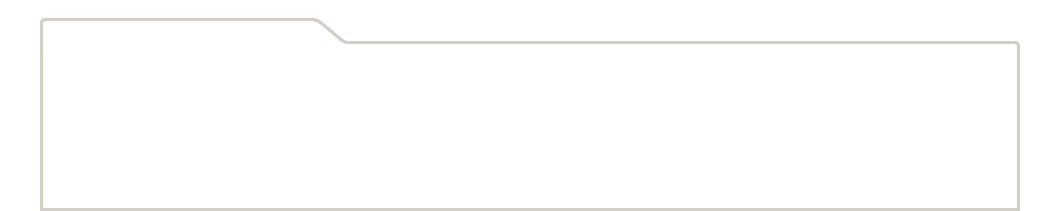
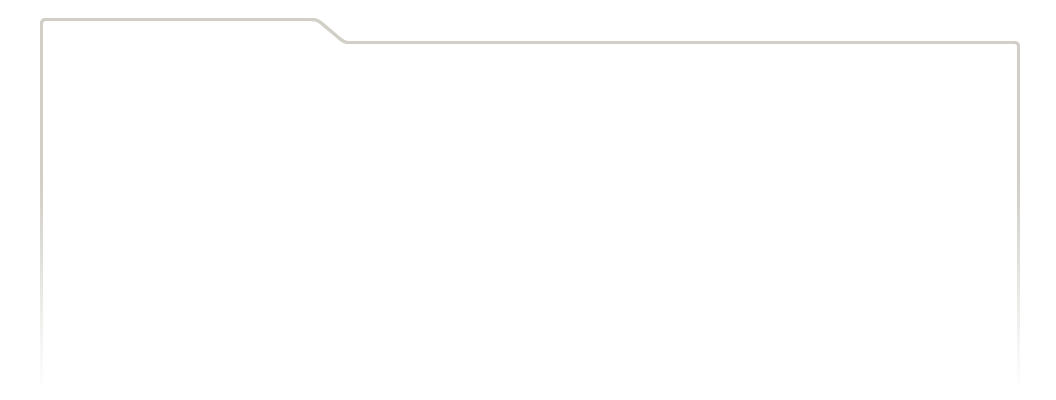
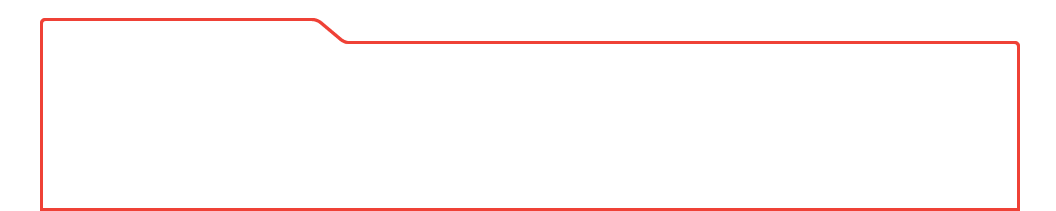
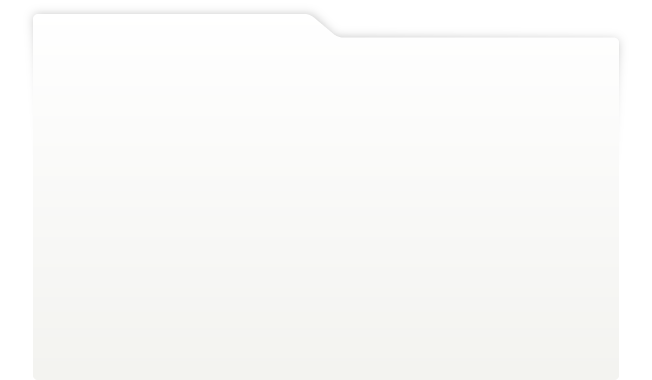
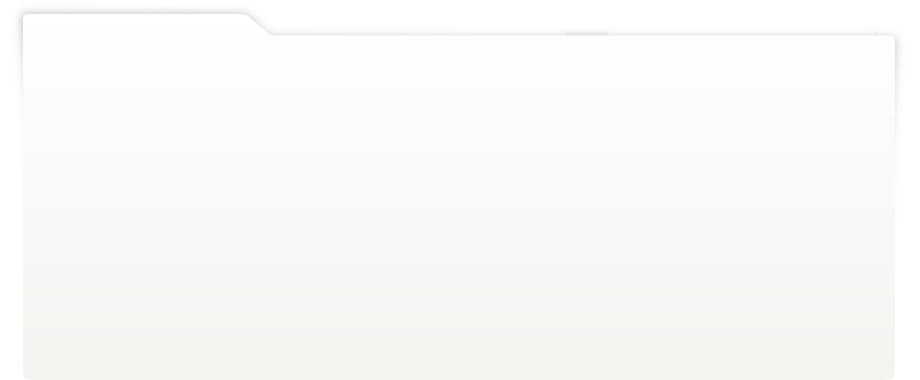
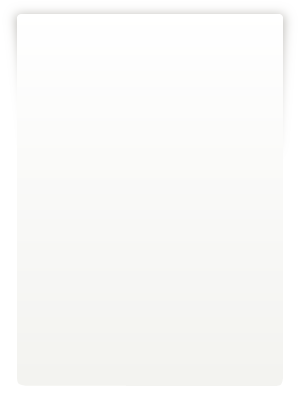
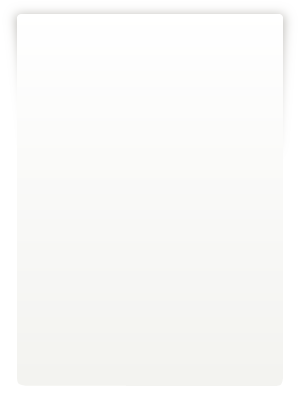
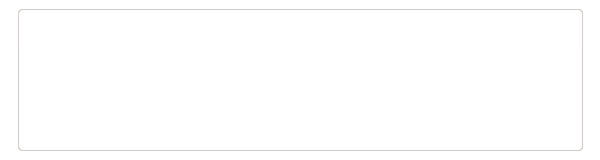
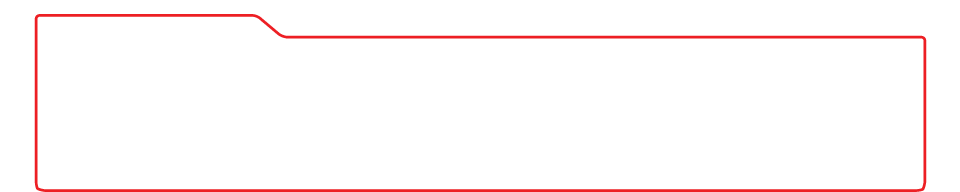
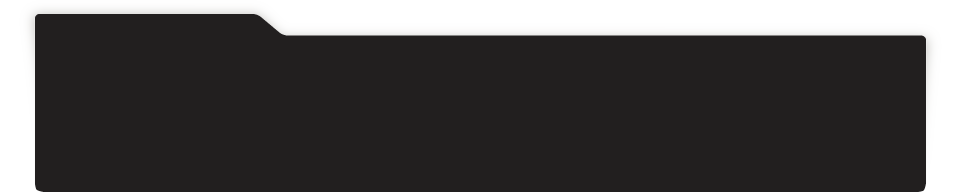
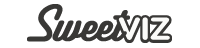
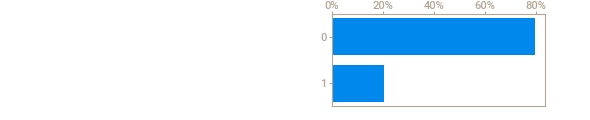
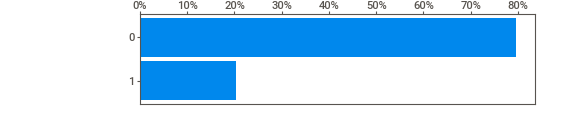
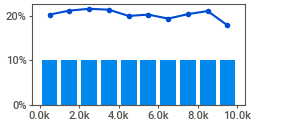
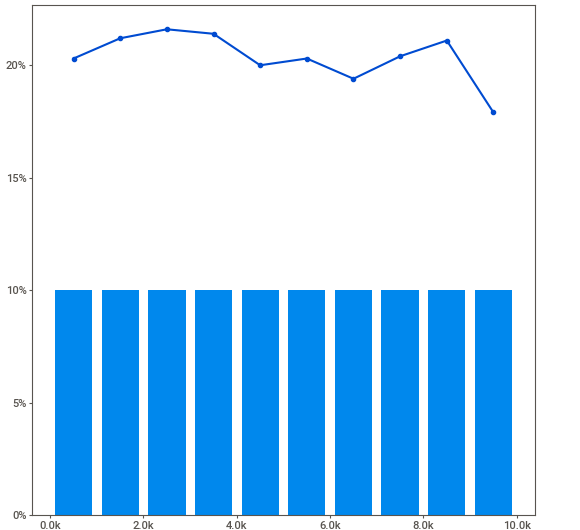
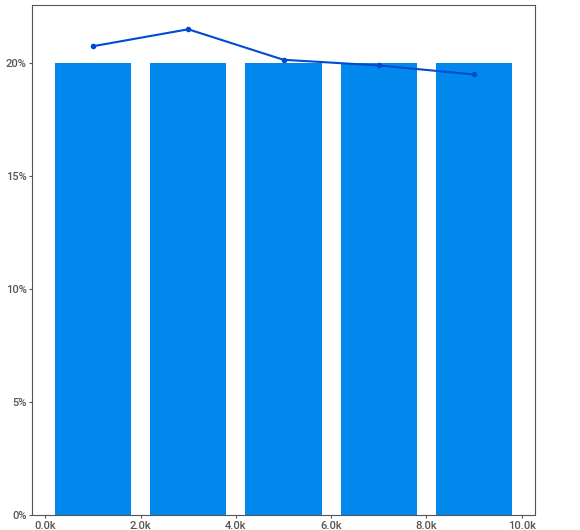
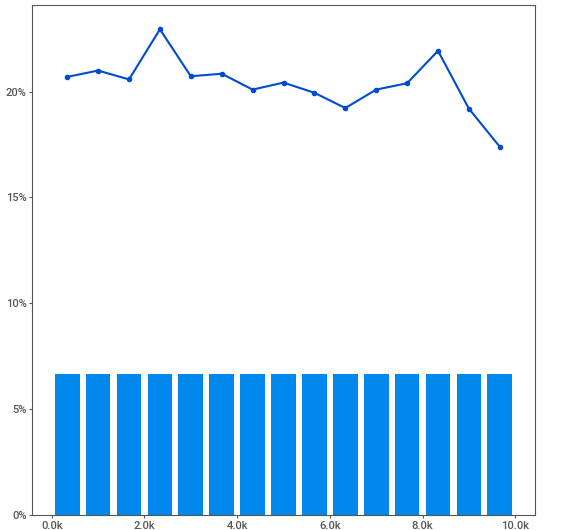
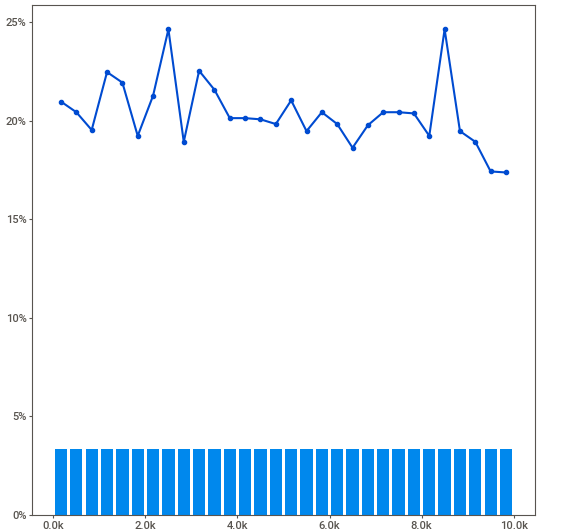
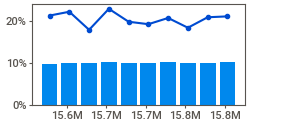
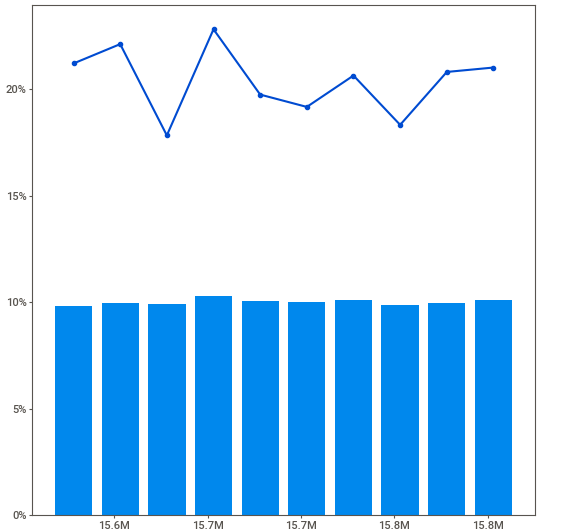
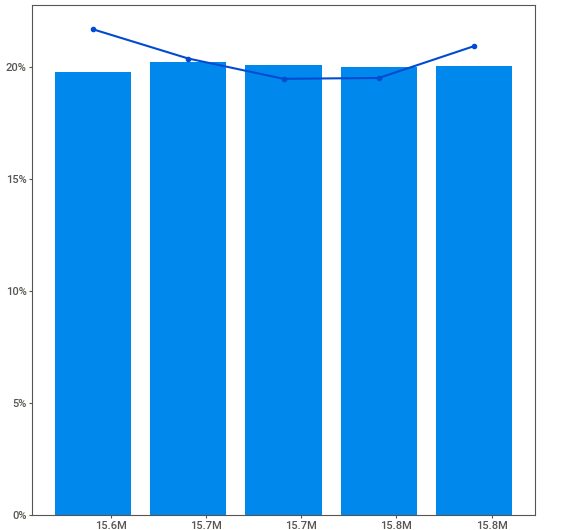
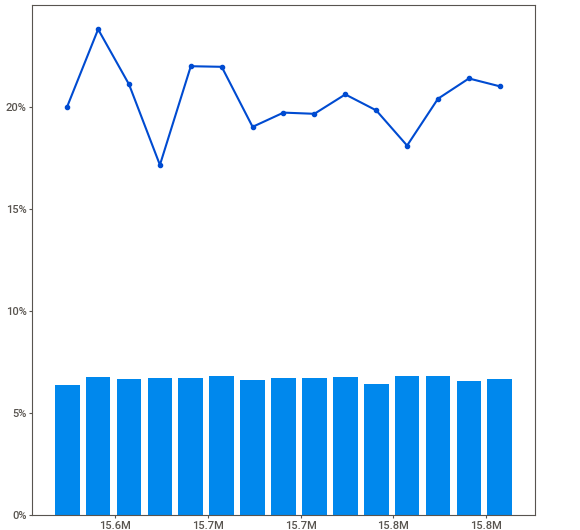
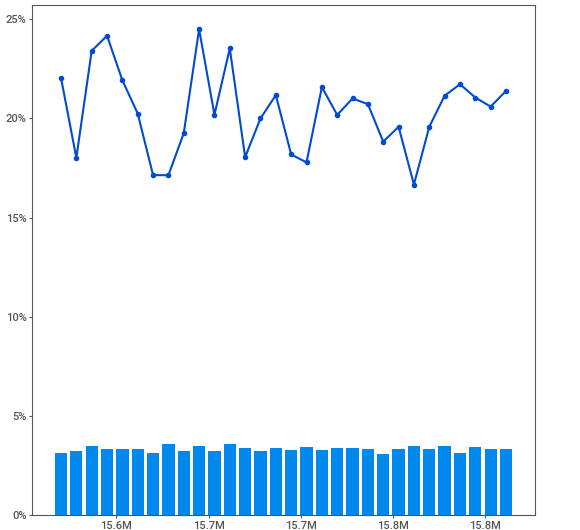
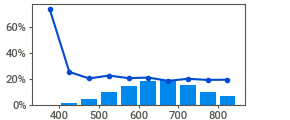
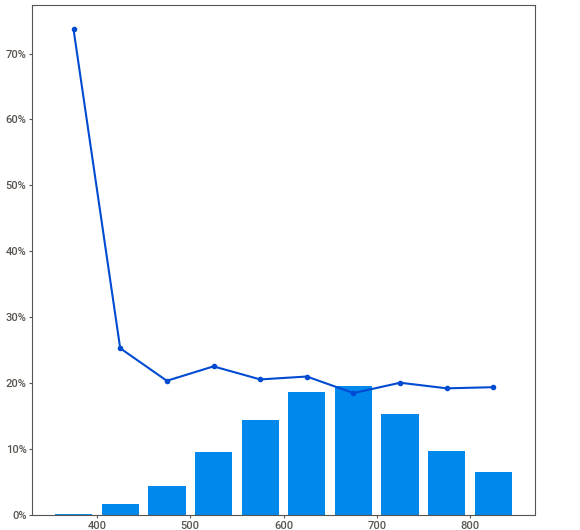
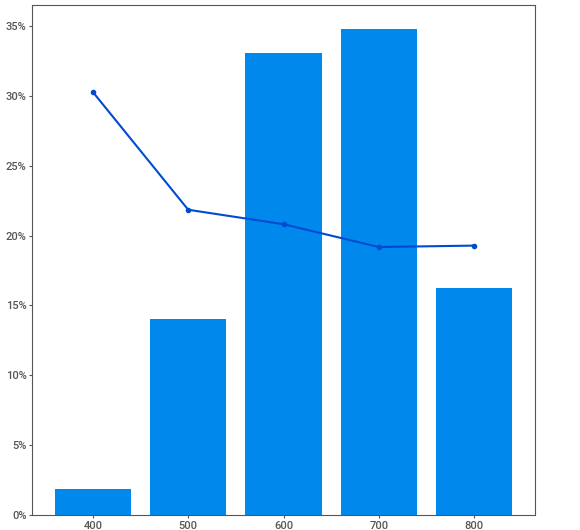
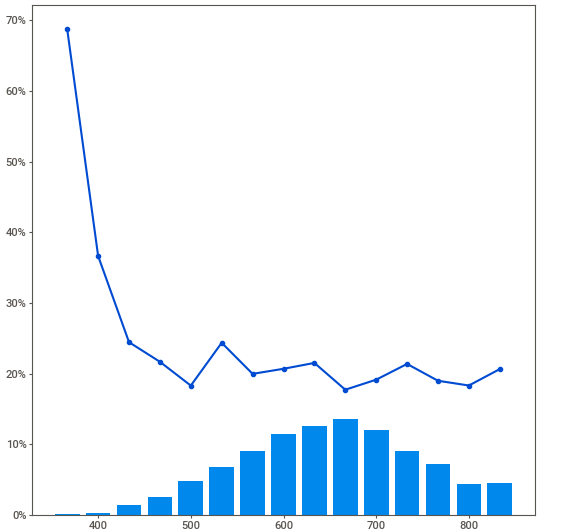
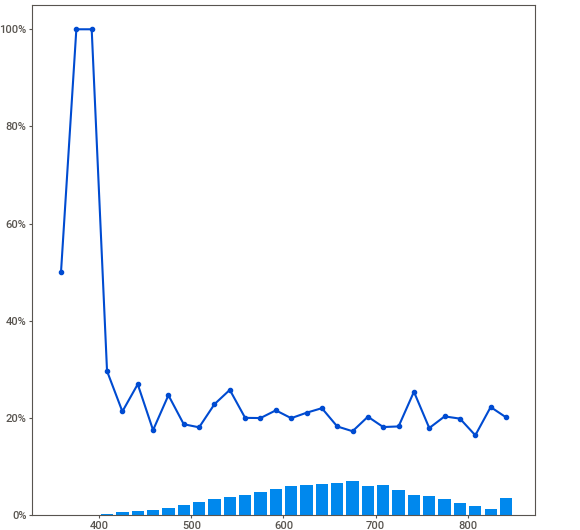
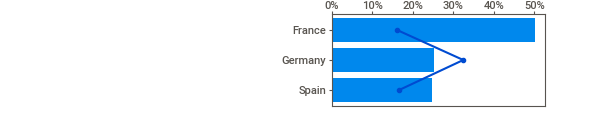
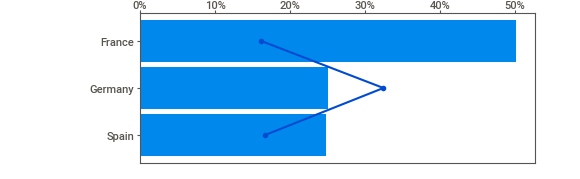
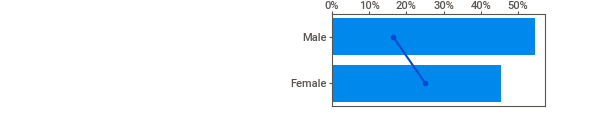
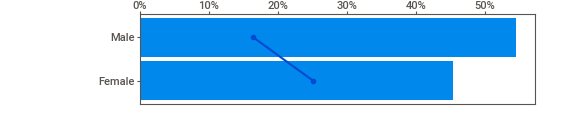
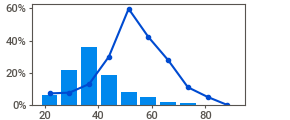
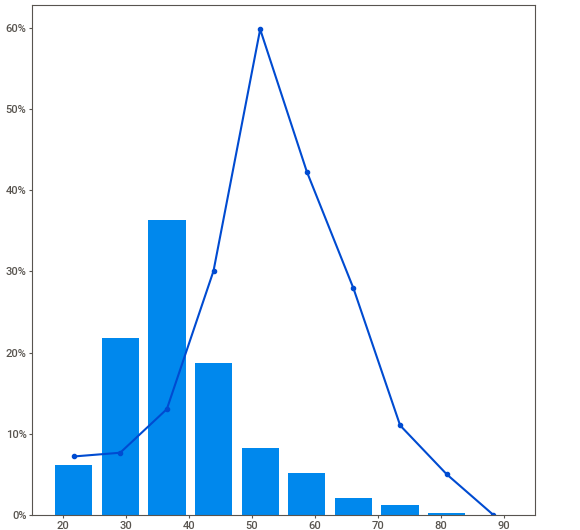
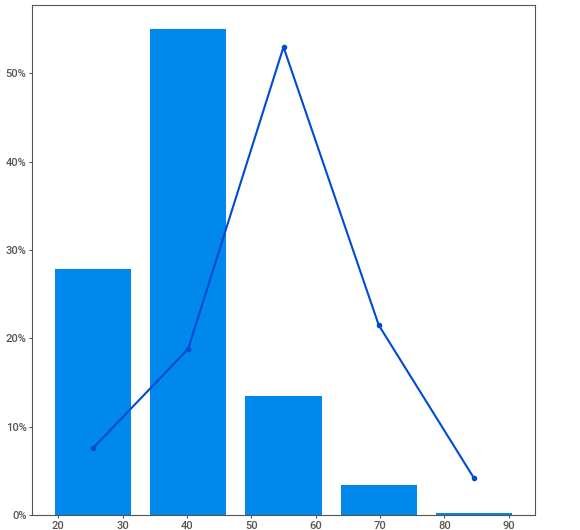
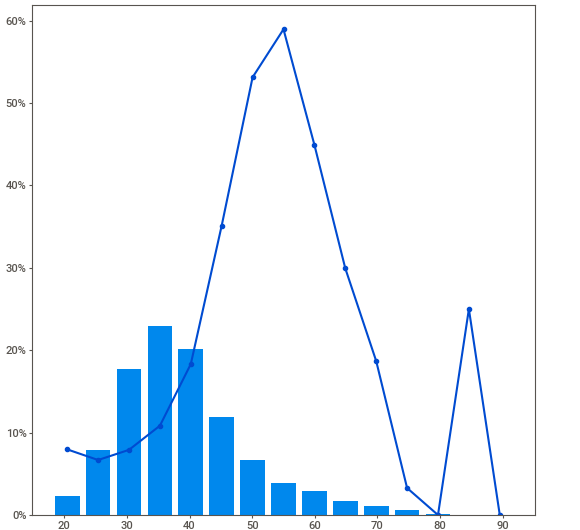
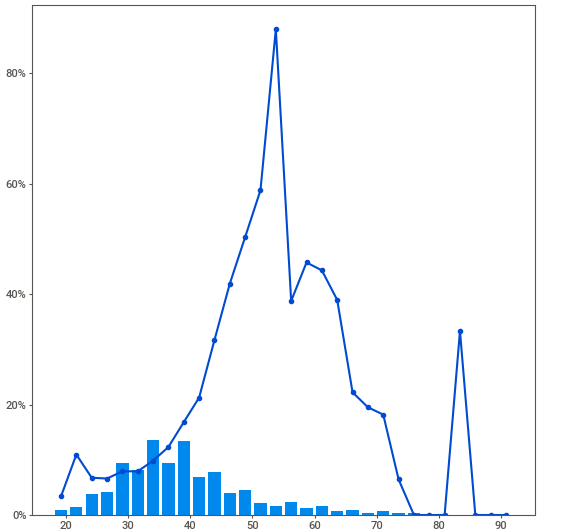
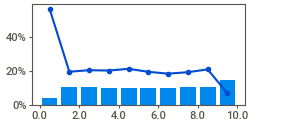
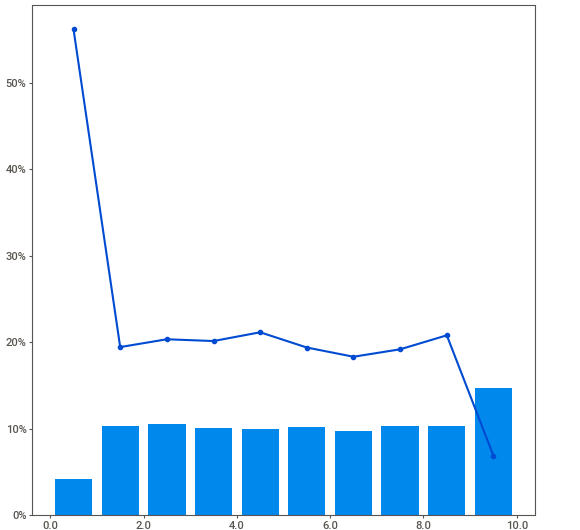
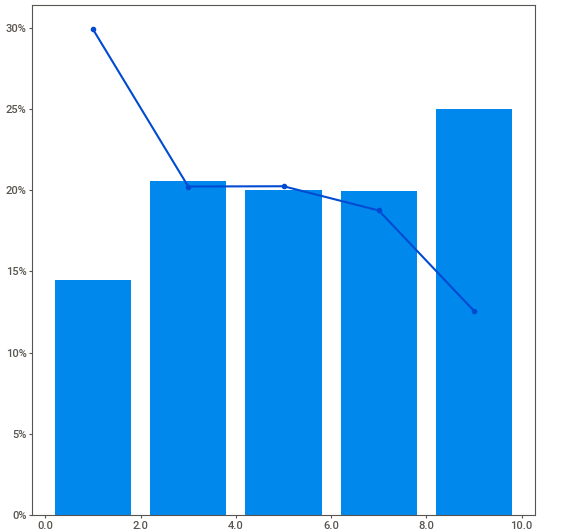
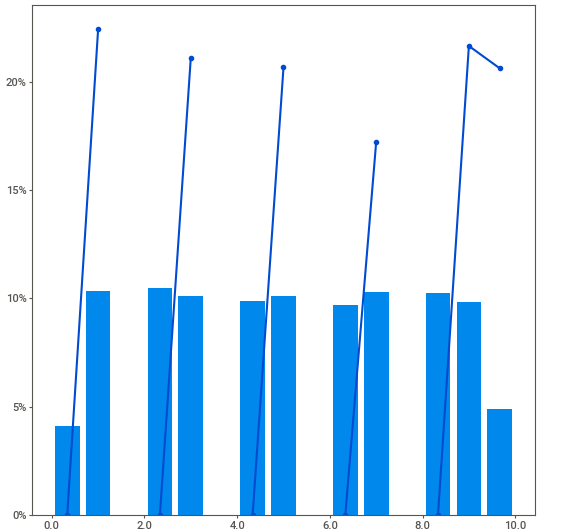
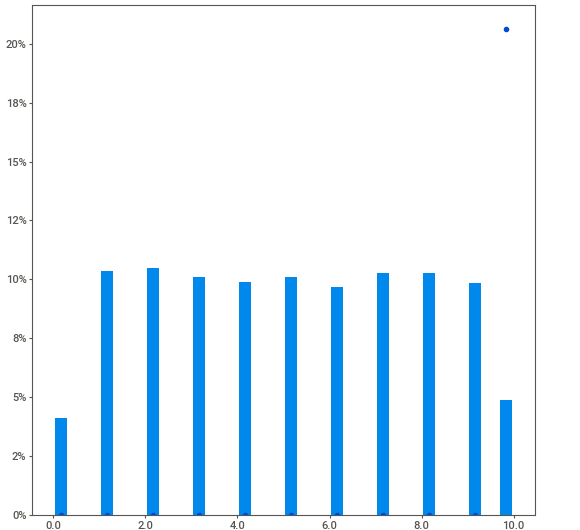
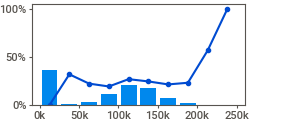
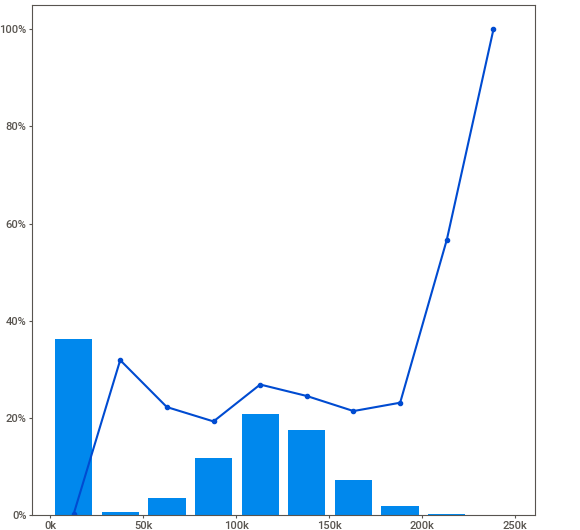
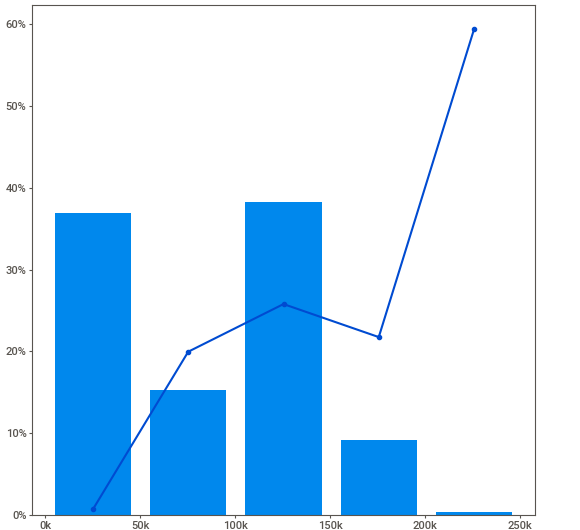
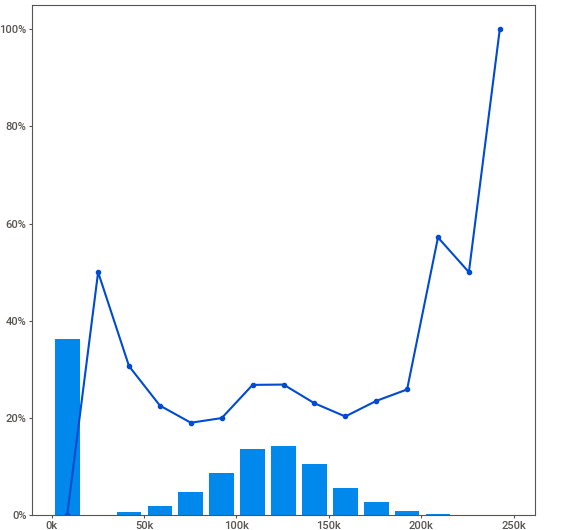
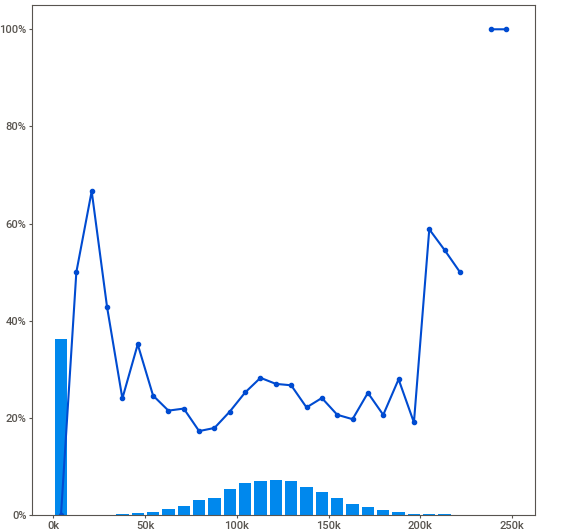
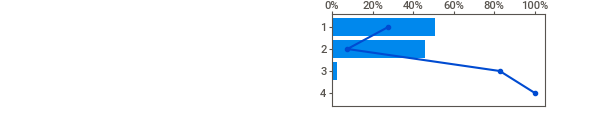
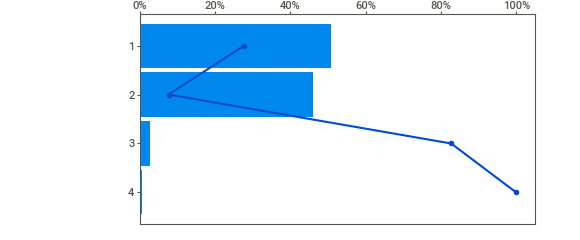
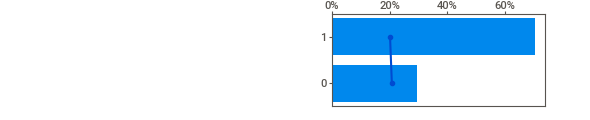
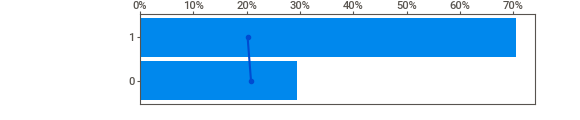
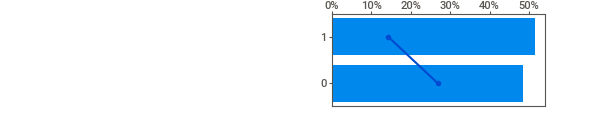
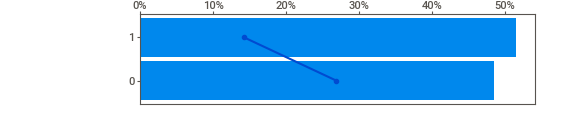
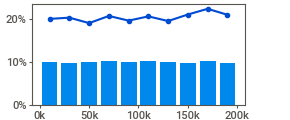
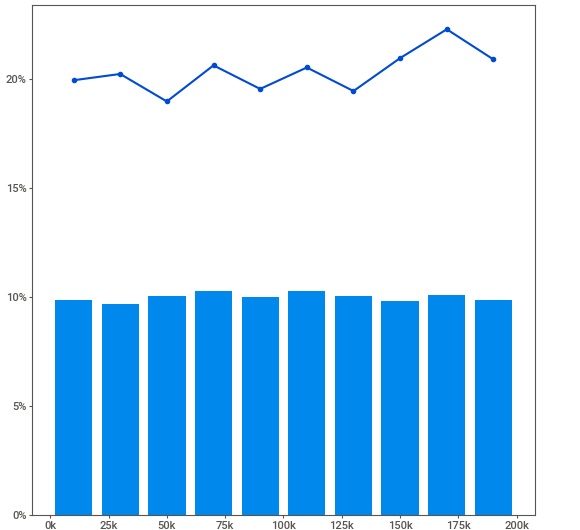
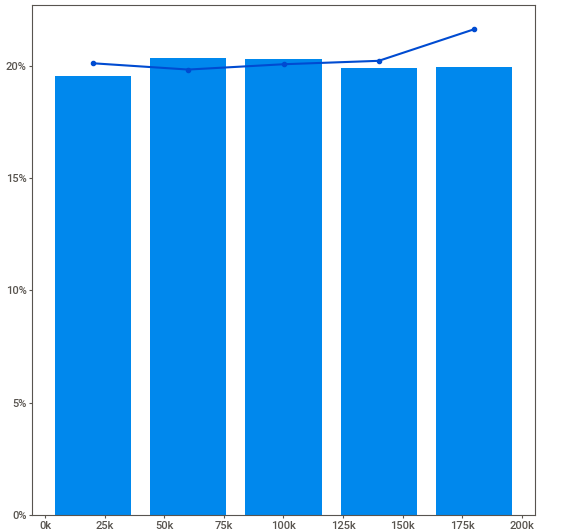
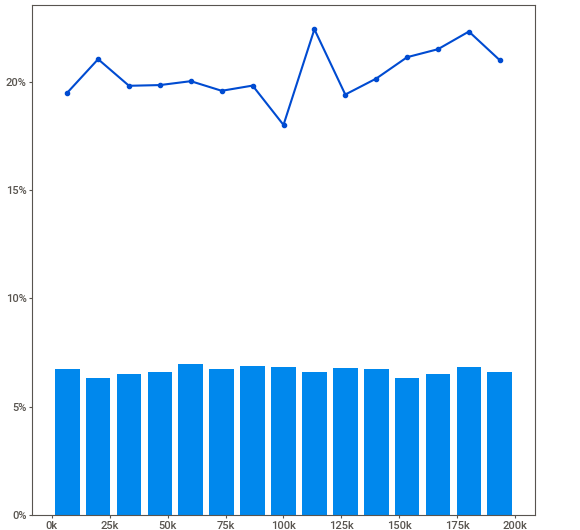
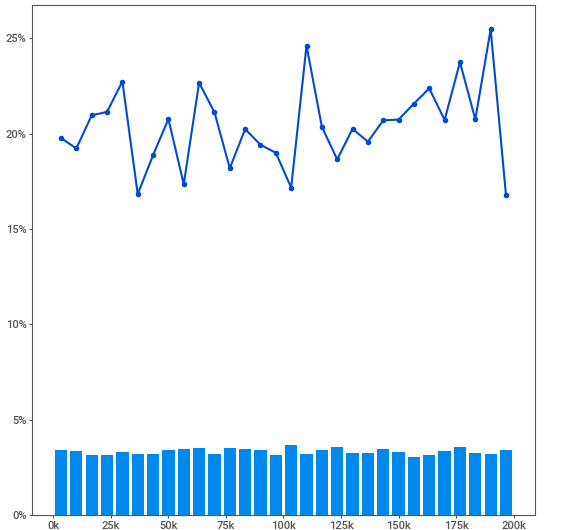
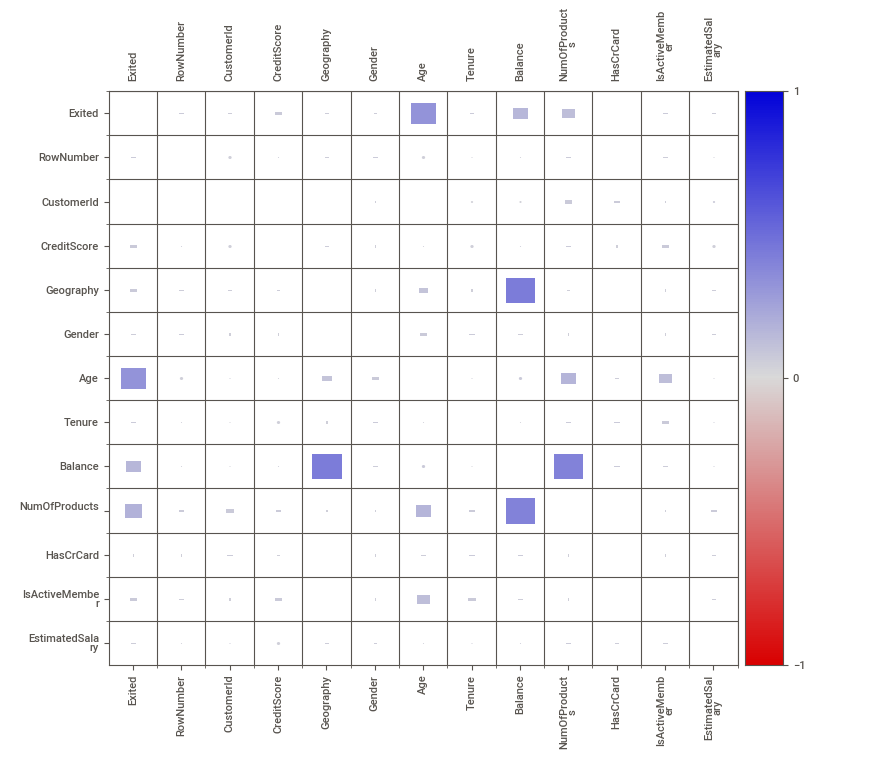
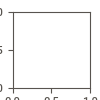

In [38]:
dash.show_notebook()

In [39]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# Iniciando o pré-processamento dos dados
# Descartando variaveis

dados.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard',], axis= 1, inplace = True)
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [41]:
# Verificando dados ausentes

def soma_ausentes(dados):
    v_faltantes = dados.isnull().sum()
    resultados = pd.DataFrame({"Variavéis": dados.columns, 'Soma de Ausentes': v_faltantes}).reset_index(drop = True)
    
    return resultados.sort_values(by = ['Variavéis'], ascending = False)

soma_ausentes(dados)

# OU dados.isnull().sum()

,Variavéis,Soma de Ausentes
4,Tenure,0
6,NumOfProducts,0
7,IsActiveMember,0
1,Geography,0
2,Gender,0
9,Exited,0
8,EstimatedSalary,0
0,CreditScore,0
5,Balance,0
3,Age,0


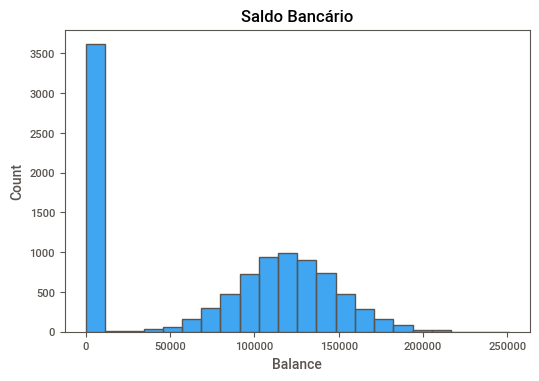

In [42]:
# Categorização de Variavéis
sns.histplot(data=dados, x='Balance').set_title('Saldo Bancário');

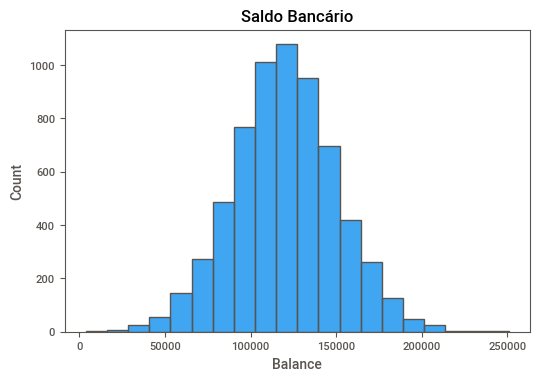

In [43]:
# Observando os dados maiores que 0
maior_0 = dados.loc[dados['Balance'] > 0]
sns.histplot(data = maior_0, x = 'Balance', bins=20).set_title('Saldo Bancário');

In [44]:
maior_0['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

In [45]:
# Função para categorizar os valores 
def aux(x):
    if x == 0:
        return 'Sem saldo'
    elif x < 100000:
        return 'Até 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k+'

# Aplicando a função na coluna 'Balance'
dados['Balance'] = dados['Balance'].apply(aux)

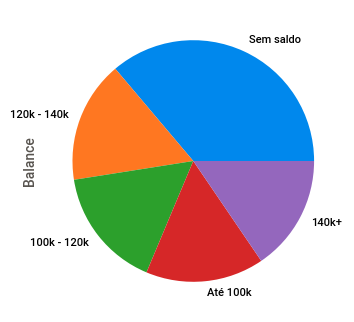

In [46]:
# Observando como ficou a variável 'Balance' 
dados['Balance'].value_counts().plot(kind = 'pie');

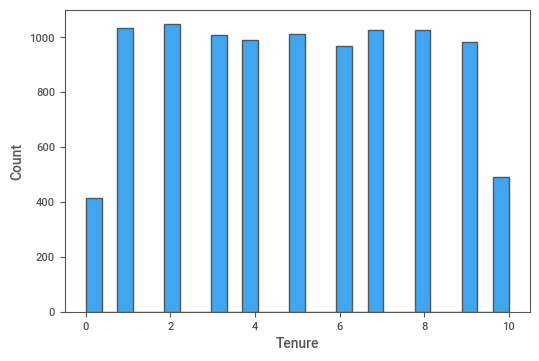

In [47]:
sns.histplot(data = dados, x = 'Tenure');

In [48]:
# Função para categorizar os valores 
def aux2(x):
    if x == 0:
        return '0'
    elif x <= 3:
        return '1 - 3'
    elif x <= 6:
        return '4 - 6'
    elif x <= 9:
        return '7 - 9'
    else:
        return '10'
    
# Aplicando a função na coluna 'Tenure'
dados['Tenure'] = dados['Tenure'].apply(aux2)

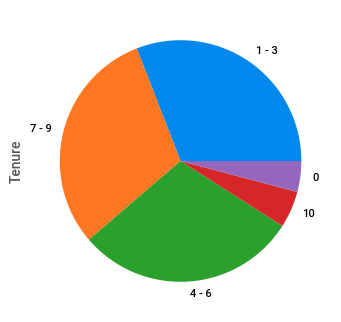

In [49]:
# Observando como ficou a variável 'Balance' 
dados['Tenure'].value_counts().plot(kind = 'pie');

In [50]:
# observando os dados de 'NumOfProducts'
dados['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

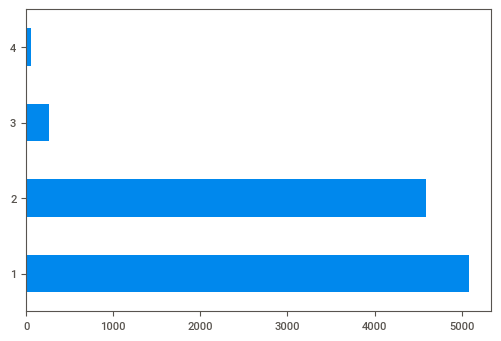

In [51]:
# Observando graficamente
dados['NumOfProducts'].value_counts().plot(kind = 'barh');

In [52]:
# Função para categorizar os valores 
def aux3(x):
    if x == 1:
        return 'Product1'
    else:
        return 'Product2+'

# Aplicando a função na coluna 'Tenure'
dados['NumOfProducts'] = dados['NumOfProducts'].apply(aux3)

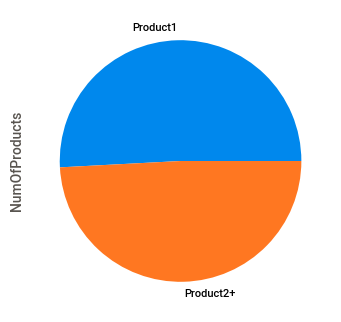

In [53]:
# Observando como ficou a variável 'Balance' 
dados['NumOfProducts'].value_counts().plot(kind = 'pie');

In [54]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,1 - 3,Sem saldo,Product1,1,101348.88,1
1,608,Spain,Female,41,1 - 3,Até 100k,Product1,1,112542.58,0
2,502,France,Female,42,7 - 9,140k+,Product2+,0,113931.57,1
3,699,France,Female,39,1 - 3,Sem saldo,Product2+,0,93826.63,0
4,850,Spain,Female,43,1 - 3,120k - 140k,Product1,1,79084.10,0


In [55]:
# Dummyficação de Variaveis

variaveis_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [56]:
dados.head()

,CreditScore,Age,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1 - 3,Tenure_10,Tenure_4 - 6,Tenure_7 - 9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Sem saldo,NumOfProducts_Product2+
0,619,42,1,101348.88,1,0,0,0,1,0,0,0,0,0,0,1,0
1,608,41,1,112542.58,0,0,1,0,1,0,0,0,0,0,1,0,0
2,502,42,0,113931.57,1,0,0,0,0,0,0,1,0,1,0,0,1
3,699,39,0,93826.63,0,0,0,0,1,0,0,0,0,0,0,1,1
4,850,43,1,79084.10,0,0,1,0,1,0,0,0,1,0,0,0,0


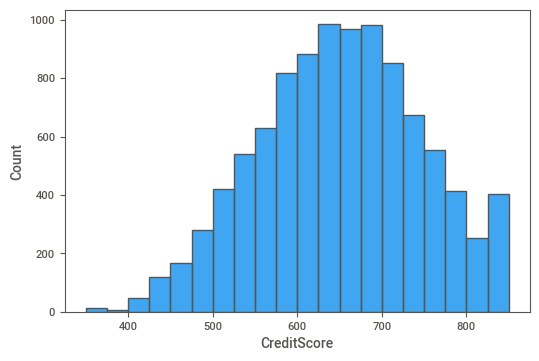

In [57]:
# Escala de variaveis

sns.histplot(data = dados, x = 'CreditScore', bins = 20);

In [58]:
# Observando a quantidade de valores nessa coluna e o valor maximo
dados['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [59]:
# Normalização dos dados

dados['CreditScore'] = dados['CreditScore'] / 1000

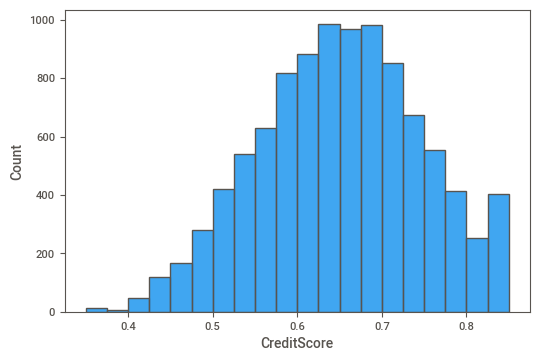

In [60]:
# Observando
sns.histplot(data = dados, x = 'CreditScore', bins = 20);

In [61]:
dados['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

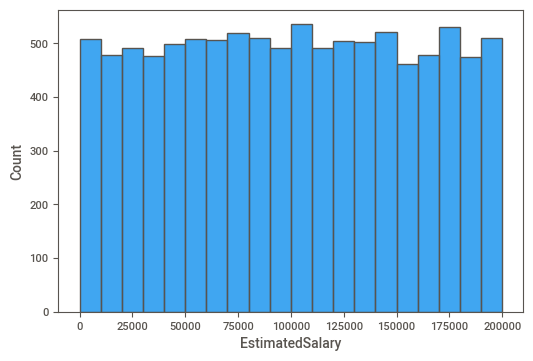

In [62]:
sns.histplot(data = dados, x = 'EstimatedSalary', bins = 20);

In [63]:
dados['EstimatedSalary'] = dados['EstimatedSalary'] / 200000

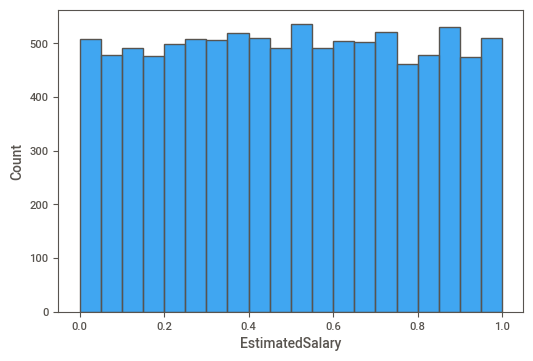

In [64]:
sns.histplot(data = dados, x = 'EstimatedSalary', bins = 20);

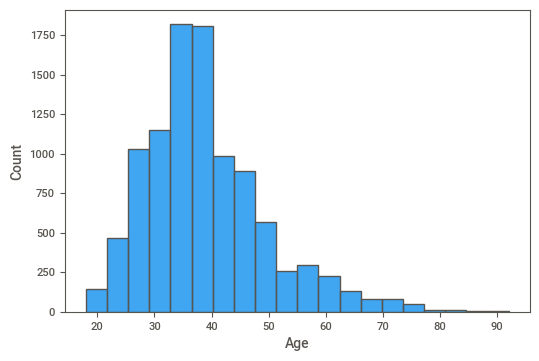

In [65]:
sns.histplot(data = dados, x = 'Age', bins = 20);

In [66]:
# padronização

import numpy as np
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])

dados['Age'] = (dados['Age'] - media)/desvio

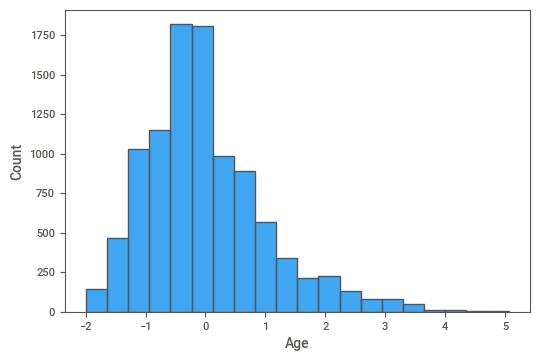

In [67]:
sns.histplot(data = dados, x = 'Age', bins = 20);

In [68]:
dados.head()

,CreditScore,Age,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1 - 3,Tenure_10,Tenure_4 - 6,Tenure_7 - 9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Sem saldo,NumOfProducts_Product2+
0,0.619,0.293517,1,0.506744,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0.608,0.198164,1,0.562713,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0.502,0.293517,0,0.569658,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0.699,0.007457,0,0.469133,0,0,0,0,1,0,0,0,0,0,0,1,1
4,0.850,0.388871,1,0.395421,0,0,1,0,1,0,0,0,1,0,0,0,0


In [69]:
# Machine Learning! 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)


In [70]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

# Função para escolher o modelo com os melhores parametros
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):
 
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = metrica, cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = metrica, cv = validacao,
                                n_iter = n_iter, verbose = 1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 

    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor

In [71]:
# Parametros para Árvore de Decisão
parametros = {   
              'max_depth' : np.arange(1,11), 
              'min_samples_split': np.arange(2,21,2),
              'min_samples_leaf': np.arange(1,11),
                 }

# Criando o modelo 
modelo = DecisionTreeClassifier()

arvore = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 50)
arvore

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.8407
Melhores parâmetros: {'min_samples_split': 8, 'min_samples_leaf': 7, 'max_depth': 6}



DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=8)

In [72]:
# Parametros para o KNN
parametros = {  'n_neighbors' : np.arange(1, 50, 2)  }

# Criando o modelo 
modelo = KNeighborsClassifier()

knn = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 30)
knn

Fitting 30 folds for each of 25 candidates, totalling 750 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 25 is smaller than n_iter=30. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Acuracia: 0.8389
Melhores parâmetros: {'n_neighbors': 29}



KNeighborsClassifier(n_neighbors=29)

In [73]:
# Parametros para Random Forest
parametros = {   
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,      
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }

# Criando o modelo 
modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 30)
rf

Fitting 30 folds for each of 30 candidates, totalling 900 fits

Acuracia: 0.8420
Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 8, 'bootstrap': True}



RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)